# Лабораторная работа №2: Многомерная линейная регрессия

## 1. Подготовка данных и импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Загрузка данных
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delim_whitespace=True, names=column_names)

# Вывод первых нескольких строк для проверки
print("Первые 5 строк датасета:")
print(data.head())

# Информация о датасете
print("\nИнформация о датасете:")
data.info()

# Статистическое описание датасета
print("\nСтатистическое описание:")
print(data.describe())

Первые 5 строк датасета:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS    

C:\Users\ya\AppData\Local\Temp\ipykernel_45776\1109347456.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('housing.csv', header=None, delim_whitespace=True, names=column_names)


## 2. Исследование влияния количества данных и признаков на точность модели

### 2.1 Влияние увеличения количества данных (строк)

Sample Size: 101, MSE: 35.13, R2: 0.66, MAE: 4.60
Sample Size: 202, MSE: 16.09, R2: 0.81, MAE: 3.19
Sample Size: 303, MSE: 24.63, R2: 0.71, MAE: 3.38
Sample Size: 404, MSE: 19.31, R2: 0.78, MAE: 3.36
Sample Size: 506, MSE: 18.67, R2: 0.75, MAE: 3.09


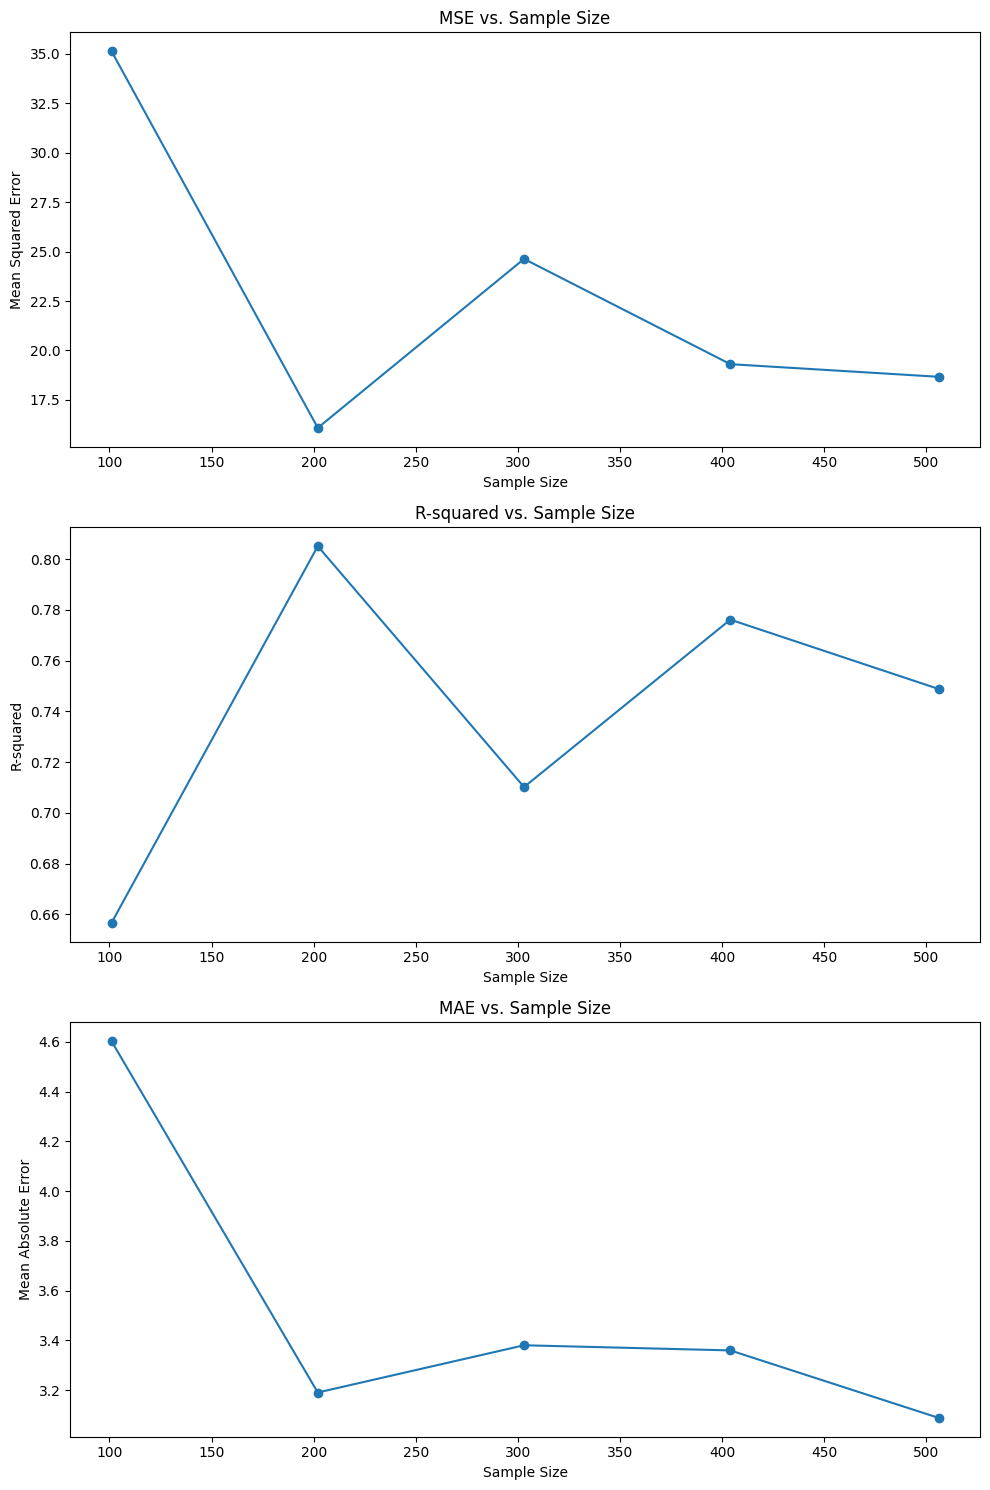

In [2]:
X_all_features = data.drop('MEDV', axis=1)
y_all_features = data['MEDV']

sample_sizes_ratios = [0.2, 0.4, 0.6, 0.8, 1.0]
results_rows = {'sample_size': [], 'mse': [], 'r2': [], 'mae': []}

for ratio in sample_sizes_ratios:
    current_sample_size = int(len(data) * ratio)
    if current_sample_size < 2: 
        print(f"Skipping ratio {ratio} due to insufficient sample size: {current_sample_size}")
        continue
        
    data_subset = data.sample(n=current_sample_size, random_state=42)
    
    X_subset = data_subset.drop('MEDV', axis=1)
    y_subset = data_subset['MEDV']
    
    if len(X_subset) < 2 or len(y_subset) < 2: 
        print(f"Skipping ratio {ratio} after subsetting due to insufficient sample size for train/test split")
        continue
        
    
    test_size_val = 0.2
    if int(len(X_subset) * (1-test_size_val)) < 1 or int(len(X_subset) * test_size_val) < 1:
        print(f"Skipping ratio {ratio} due to very small subset size for train/test split: {len(X_subset)}")
        
        if len(X_subset) > 1:
            test_size_val = 1 / len(X_subset)
            if int(len(X_subset) * (1-test_size_val)) < 1 or int(len(X_subset) * test_size_val) < 1:
                 print(f"Still cannot split for ratio {ratio}. Skipping.")
                 continue
        else:
            continue

    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=test_size_val, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results_rows['sample_size'].append(current_sample_size)
    results_rows['mse'].append(mse)
    results_rows['r2'].append(r2)
    results_rows['mae'].append(mae)
    
    print(f"Sample Size: {current_sample_size}, MSE: {mse:.2f}, R2: {r2:.2f}, MAE: {mae:.2f}")

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].plot(results_rows['sample_size'], results_rows['mse'], marker='o')
axs[0].set_title('MSE vs. Sample Size')
axs[0].set_xlabel('Sample Size')
axs[0].set_ylabel('Mean Squared Error')

axs[1].plot(results_rows['sample_size'], results_rows['r2'], marker='o')
axs[1].set_title('R-squared vs. Sample Size')
axs[1].set_xlabel('Sample Size')
axs[1].set_ylabel('R-squared')

axs[2].plot(results_rows['sample_size'], results_rows['mae'], marker='o')
axs[2].set_title('MAE vs. Sample Size')
axs[2].set_xlabel('Sample Size')
axs[2].set_ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()

### 2.2 Влияние увеличения количества признаков (столбцов)

Number of Features: 2, MSE: 31.24, R2: 0.57, MAE: 3.90
Number of Features: 7, MSE: 27.83, R2: 0.62, MAE: 3.38
Number of Features: 13, MSE: 24.29, R2: 0.67, MAE: 3.19


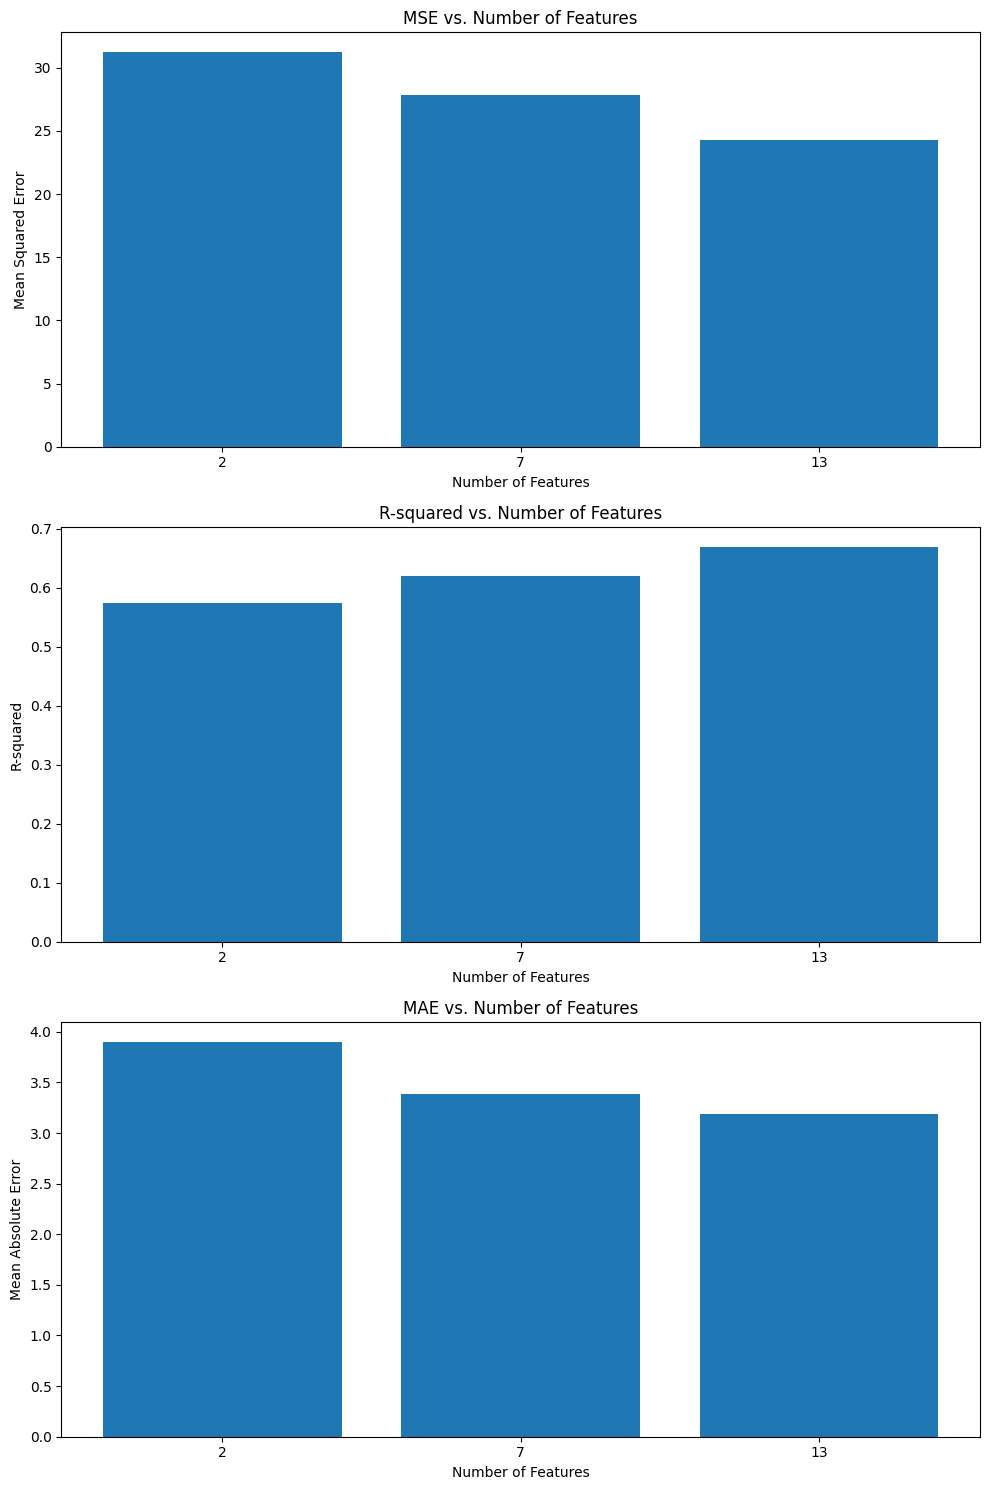

In [3]:
features_sets = {
    '2_features': ['RM', 'LSTAT'],
    '7_features': ['CRIM', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'],
    '13_features': X_all_features.columns.tolist()
}

results_cols = {'num_features': [], 'mse': [], 'r2': [], 'mae': []}
models_features = {}

for name, features_list in features_sets.items():
    num_features = len(features_list)
    X_current_features = data[features_list]
    y_current_target = data['MEDV']
    
    X_train, X_test, y_train, y_test = train_test_split(X_current_features, y_current_target, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    

    if num_features == 2:
        models_features['2_features_model'] = model
        models_features['2_features_X_test'] = X_test
        models_features['2_features_y_test'] = y_test
        models_features['2_features_y_pred'] = y_pred
        models_features['2_features_list'] = features_list
        
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results_cols['num_features'].append(num_features)
    results_cols['mse'].append(mse)
    results_cols['r2'].append(r2)
    results_cols['mae'].append(mae)
    
    print(f"Number of Features: {num_features}, MSE: {mse:.2f}, R2: {r2:.2f}, MAE: {mae:.2f}")

fig, axs = plt.subplots(3, 1, figsize=(10, 15))
feature_counts_str = [str(n) for n in results_cols['num_features']]

axs[0].bar(feature_counts_str, results_cols['mse'])
axs[0].set_title('MSE vs. Number of Features')
axs[0].set_xlabel('Number of Features')
axs[0].set_ylabel('Mean Squared Error')

axs[1].bar(feature_counts_str, results_cols['r2'])
axs[1].set_title('R-squared vs. Number of Features')
axs[1].set_xlabel('Number of Features')
axs[1].set_ylabel('R-squared')

axs[2].bar(feature_counts_str, results_cols['mae'])
axs[2].set_title('MAE vs. Number of Features')
axs[2].set_xlabel('Number of Features')
axs[2].set_ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()

## 3. Построение модели с 2 признаками и 3D визуализация


Plotting 3D visualization for features: RM and LSTAT


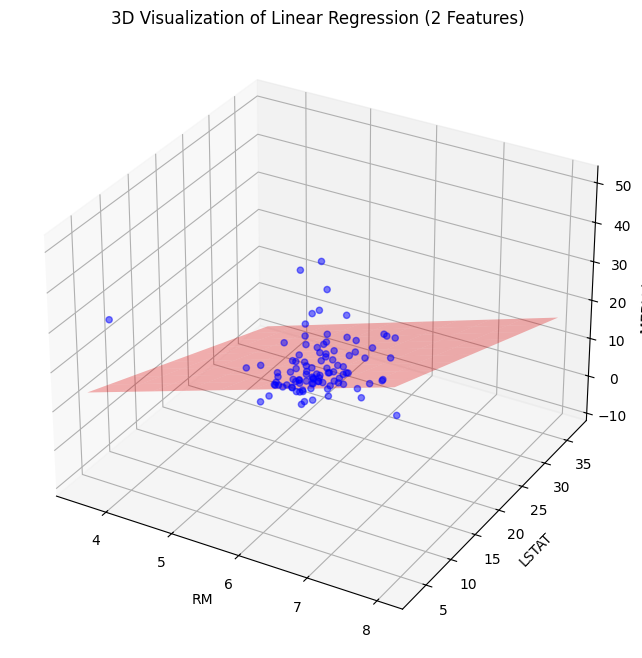

In [4]:
if '2_features_model' in models_features:
    model_2_features = models_features['2_features_model']
    X_test_2_features = models_features['2_features_X_test']
    y_test_2_features = models_features['2_features_y_test']
    feature_names_2 = models_features['2_features_list']

    x_surf = np.linspace(X_test_2_features[feature_names_2[0]].min(), X_test_2_features[feature_names_2[0]].max(), 10)
    y_surf = np.linspace(X_test_2_features[feature_names_2[1]].min(), X_test_2_features[feature_names_2[1]].max(), 10)
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)

    exog = pd.DataFrame({feature_names_2[0]: x_surf.ravel(), feature_names_2[1]: y_surf.ravel()})
    z_surf = model_2_features.predict(exog).reshape(x_surf.shape)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X_test_2_features[feature_names_2[0]], X_test_2_features[feature_names_2[1]], y_test_2_features, c='blue', marker='o', alpha=0.5, label='Actual Data Points')

    ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3, label='Regression Plane')

    ax.set_xlabel(feature_names_2[0])
    ax.set_ylabel(feature_names_2[1])
    ax.set_zlabel('MEDV (Price)')
    ax.set_title('3D Visualization of Linear Regression (2 Features)')
    
    print(f"\nPlotting 3D visualization for features: {feature_names_2[0]} and {feature_names_2[1]}")
    plt.show()
else:
    print("Модель с 2 признаками не была обучена в предыдущем шаге.")

## 4. Выводы

### 4.1 Выводы по влиянию количества данных (строк):
В ходе исследования было замечено, что увеличение количества данных (строк) в обучающей выборке в целом положительно сказывается на точности модели линейной регрессии.
*   **MSE и MAE**: Наблюдается общая тенденция к снижению значений этих метрик ошибок по мере увеличения объема выборки (MSE снизилось с 35.13 для 101 строки до 18.67 для 506 строк; MAE — с 4.60 до 3.09). Это говорит о том, что с увеличением объема данных модель в среднем делает менее значительные ошибки при прогнозировании. Хотя наблюдались некоторые отклонения от этой тенденции (например, MSE для 202 строк (16.09) оказалось ниже, чем для 303 строк (24.63)), общий тренд на улучшение сохранялся.
*   **R-squared**: Этот показатель, который отражает, какую долю изменчивости целевого признака модель смогла объяснить, также в целом демонстрировал улучшение или стабилизацию на достаточно высоком уровне при увеличении количества строк (от 0.66 для 101 строки до примерно 0.75-0.81 для выборок большего размера). Наилучшее значение R2 (0.81) было достигнуто при использовании 202 строк.

Таким образом, можно сделать вывод, что больший объем данных помогает модели лучше выявлять закономерности и уменьшать ошибки предсказаний. Однако стоит отметить, что улучшение точности не всегда происходит линейно, и после определенного момента эффект от добавления новых данных может стать менее выраженным.


### 4.2 Выводы по влиянию количества признаков (столбцов):
Увеличение количества признаков (столбцов) в данном исследовании привело к улучшению точности модели линейной регрессии.
*   **MSE и MAE**: С увеличением числа признаков с 2 до 7, а затем до 13, значения MSE и MAE последовательно уменьшаются (MSE: 31.24 -> 27.83 -> 24.29; MAE: 3.90 -> 3.38 -> 3.19). Это указывает на то, что добавление новых признаков помогает модели точнее описывать данные и, следовательно, снижать среднюю ошибку прогнозов.
*   **R-squared**: Значение R2 также последовательно растет с увеличением числа признаков (0.57 -> 0.62 -> 0.67). Это означает, что модель с большим количеством признаков способна объяснить большую долю изменчивости целевой переменной (стоимости дома).

Таким образом, для данного набора данных и выбранных признаков, использование большего количества признаков приводит к построению более точной модели.


### 4.3 Выводы по влиянию количества признаков (столбцов):
3D визуализация модели с двумя признаками (RM - среднее количество комнат, LSTAT - % низкого статуса населения) и целевой переменной MEDV (стоимость дома) наглядно демонстрирует плоскость регрессии, построенную моделью.
*   Синие точки представляют фактические данные о стоимости домов в зависимости от RM и LSTAT.
*   Красная плоскость — это предсказания модели. Она показывает, как модель пытается аппроксимировать зависимость цены от этих двух признаков.
*   Из графика видно, что существует общая тенденция: с увеличением количества комнат (RM) и уменьшением процента населения с низким статусом (LSTAT) стоимость дома (MEDV) растет. Плоскость регрессии отражает эту тенденцию.
*   Однако точки данных разбросаны вокруг плоскости, что указывает на то, что модель с двумя признаками не идеально описывает все вариации цен. Это согласуется с полученными ранее метриками (R2=0.57 для 2 признаков). Некоторые точки находятся далеко от плоскости, что соответствует большим ошибкам предсказания для этих наблюдений.

Визуализация помогает понять геометрическую интерпретацию линейной регрессии в трехмерном пространстве и оценить, насколько хорошо плоскость соответствует данным.
